In [1]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Сессия 1

## 1.1 Подготовка обучающей  и тестовой выборок

In [2]:
df = pd.read_csv('train_ses.csv', sep = ',')
df_test = pd.read_csv('test_ses.csv', sep = ',')
df

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253557,253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253558,253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
253559,253560,812,2013-12-19 15:20:22,676.0,2013-12-19 15:20:22,814.0,2013-12-19 15:20:22,22.0,2013-12-19 15:20:22,39.0,...,2013-12-19 15:20:23,814.0,2013-12-19 15:20:23,570.0,2013-12-19 15:20:23,22.0,2013-12-19 15:20:24,570.0,2013-12-19 15:20:24,0


In [3]:
# кол-во 0 и 1 в колонке target
df['target'].value_counts()

target
0    251264
1      2297
Name: count, dtype: int64

In [4]:
# дроп дубликатов
print(f'размер до удаления дубликатов: {df.shape}')
df = df.drop_duplicates()
print(f'размер после удаления дубликатов: {df.shape}')

размер до удаления дубликатов: (253561, 22)
размер после удаления дубликатов: (253561, 22)


дубликатов не оказалось

In [5]:
# удаляем колонку session_id, тк она не важна при анализе
df = df.drop(columns = ['session_id'])
df_test = df_test.drop(columns = ['session_id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

все колонки, в которых записано время посещения сайта, имеют тип данных object
из колонок с индексом сайта (??его номером) только одна имеет тип данных int, у остальных float
________________________________________

пропуски:

<Axes: >

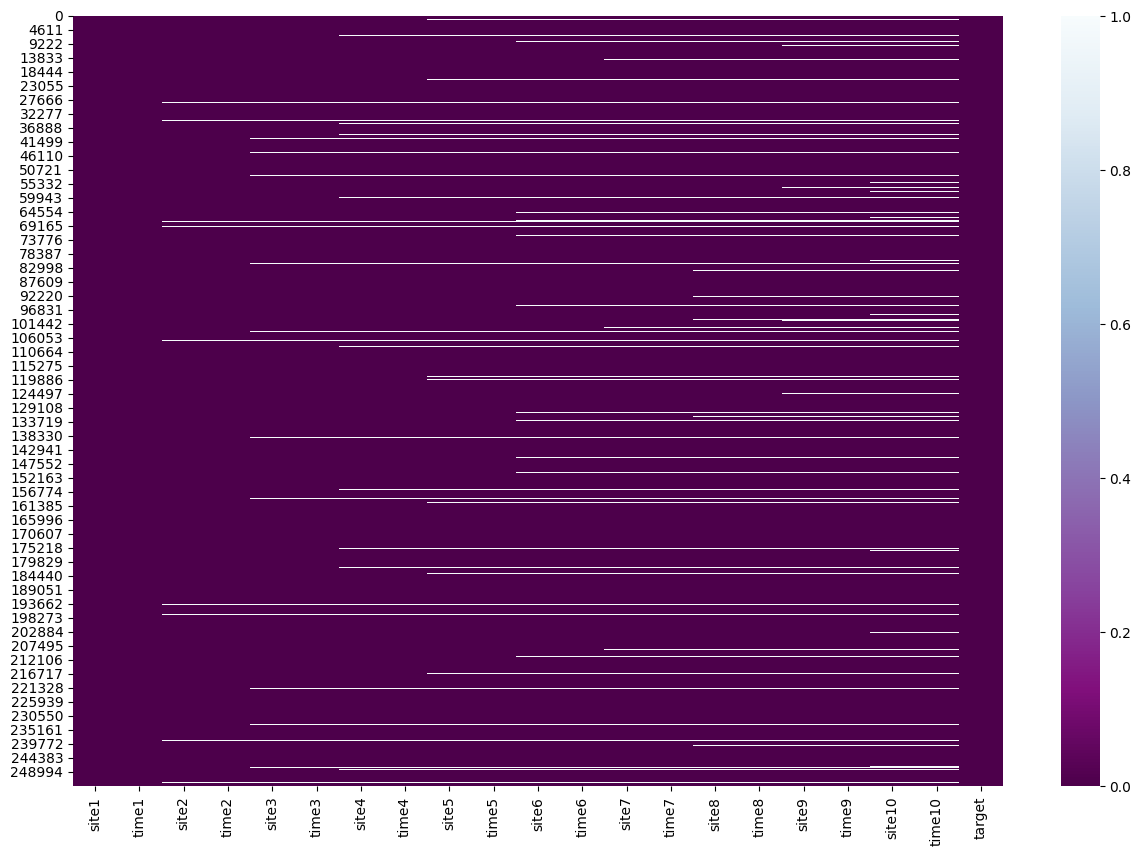

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cmap = 'BuPu_r')

есть строчки, в которых много колонок не заполнено.

пропуски стоят подряд -> можно предположить, что пользователи посещали меньше 10-ти сайтов во время сеанса 

In [8]:
# выводим кол-во пропусков по столбцам
null_cols = df.isnull().sum().reset_index()
null_cols.columns = ['Col', 'Null count']
null_cols

,Col,Null count
0,site1,0
1,time1,0
2,site2,3463
3,time2,3463
4,site3,6642
5,time3,6642
6,site4,9240
7,time4,9240
8,site5,11732
9,time5,11732


попарно (сайт 1 - время 1 и так далее) кол-во пропусков в колонках совпадает
___________________________________________________________________________________________________

смотрим сколько строчек с пропусками и значением target = 1 есть в дф

In [9]:
nul_and_target_1 = df[(df.isnull().any(axis = 1)) & (df['target'] == 1)]
nul_and_target_1

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
9515,5301,2014-03-31 16:48:56,5301.0,2014-03-31 16:49:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11461,27247,2014-01-04 18:11:07,27247.0,2014-01-04 18:11:08,27247.0,2014-01-04 18:11:26,27247.0,2014-01-04 18:11:27,27247.0,2014-01-04 18:11:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23887,510,2014-02-17 18:14:31,515.0,2014-02-17 18:14:31,519.0,2014-02-17 18:14:32,1407.0,2014-02-17 18:14:32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24772,170,2014-02-20 15:00:28,1074.0,2014-02-20 15:00:30,1074.0,2014-02-20 15:00:31,1074.0,2014-02-20 15:00:46,63.0,2014-02-20 15:02:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
28762,80,2013-11-22 13:33:06,76.0,2013-11-22 13:33:13,80.0,2013-11-22 13:33:14,76.0,2013-11-22 13:33:16,80.0,2013-11-22 13:33:16,...,2013-11-22 13:33:24,52.0,2013-11-22 13:33:27,NaN,NaN,NaN,NaN,NaN,NaN,1
30891,3000,2014-04-02 16:05:03,3000.0,2014-04-02 16:05:04,3000.0,2014-04-02 16:05:05,37.0,2014-04-02 16:05:19,39.0,2014-04-02 16:08:48,...,2014-04-02 16:08:49,3000.0,2014-04-02 16:10:08,NaN,NaN,NaN,NaN,NaN,NaN,1
43549,51,2014-03-20 13:28:04,3.0,2014-03-20 13:28:08,11.0,2014-03-20 13:28:08,27190.0,2014-03-20 13:28:08,8.0,2014-03-20 13:28:09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
43721,1,2014-01-28 14:14:19,63.0,2014-01-28 14:17:03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
46985,704,2014-01-14 16:04:12,33.0,2014-01-14 16:04:12,106.0,2014-01-14 16:04:12,3000.0,2014-01-14 16:04:13,29.0,2014-01-14 16:04:13,...,2014-01-14 16:04:14,3000.0,2014-01-14 16:04:17,3000.0,2014-01-14 16:04:20,3000.0,2014-01-14 16:09:18,NaN,NaN,1
55817,21,2014-02-25 17:56:01,21.0,2014-02-25 17:56:17,3000.0,2014-02-25 17:56:17,3000.0,2014-02-25 18:14:04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


всего 39 таких строк. есть сайты, которые в сессиях повторяются + на которые заходили несколько раз за одну сессию

In [10]:
# мин. индексы у сайтов
col_site = ['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9', 'site10']

print(df[col_site].min())

site1     1.0
site2     1.0
site3     1.0
site4     1.0
site5     1.0
site6     1.0
site7     1.0
site8     1.0
site9     1.0
site10    1.0
dtype: float64


везде единица, значит 0 как индекс не используется
_________________________________________________________________________________________________________

заполним пропуски нулями в колонках с ид сайтов

In [11]:
df[col_site] = df[col_site].fillna(0)
df_test[col_site] = df_test[col_site].fillna(0)
dff = df.copy()
dff

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,718,2014-02-20 10:02:45,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0
1,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,2013-11-25 10:27:13,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253557,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,2013-03-12 16:01:17,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253558,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,2013-09-12 14:06:30,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0
253559,812,2013-12-19 15:20:22,676.0,2013-12-19 15:20:22,814.0,2013-12-19 15:20:22,22.0,2013-12-19 15:20:22,39.0,2013-12-19 15:20:22,...,2013-12-19 15:20:23,814.0,2013-12-19 15:20:23,570.0,2013-12-19 15:20:23,22.0,2013-12-19 15:20:24,570.0,2013-12-19 15:20:24,0


In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   253561 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   253561 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   253561 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   253561 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   253561 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   253561 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   253561 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   253561 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  253561 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

In [13]:
# в колонках с идентификаторами сайтов меняем тип данных на целочисленное
dff[col_site] = dff[col_site].astype('int64')
dff

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,718,2014-02-20 10:02:45,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0
2,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0
3,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0
4,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175,2014-02-28 10:55:59,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,3474,2013-11-25 10:26:58,141,2013-11-25 10:27:03,2428,2013-11-25 10:27:04,106,2013-11-25 10:27:13,...,2013-11-25 10:27:16,2428,2013-11-25 10:27:28,2428,2013-11-25 10:27:40,2428,2013-11-25 10:27:52,148,2013-11-25 10:27:53,0
253557,12727,2013-03-12 16:01:15,12727,2013-03-12 16:01:16,2215,2013-03-12 16:01:16,38,2013-03-12 16:01:17,2215,2013-03-12 16:01:17,...,2013-03-12 16:01:17,25444,2013-03-12 16:01:18,2215,2013-03-12 16:01:18,23,2013-03-12 16:01:18,21,2013-03-12 16:01:18,0
253558,2661,2013-09-12 14:05:03,15004,2013-09-12 14:05:10,5562,2013-09-12 14:05:10,5562,2013-09-12 14:06:29,5562,2013-09-12 14:06:30,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
253559,812,2013-12-19 15:20:22,676,2013-12-19 15:20:22,814,2013-12-19 15:20:22,22,2013-12-19 15:20:22,39,2013-12-19 15:20:22,...,2013-12-19 15:20:23,814,2013-12-19 15:20:23,570,2013-12-19 15:20:23,22,2013-12-19 15:20:24,570,2013-12-19 15:20:24,0


______________________________________________________________________________________________________

Колонки time можно разбить на несколько колонок: 
- время суток (one hot кодирование)
- дата (год+месяц)
- день недели
- длительность посещения сайта

In [14]:
# добавляем продолжительность посещения. между колонками с пропусками считаем продолжительность как 0

def time_diff(dff):
    df3 = dff.copy()
    for i in range(1, 10):
        time_col1 = f'time{i}'
        time_col2 = f'time{i+1}'
        # разница между посещением
        diff = pd.to_datetime(dff[time_col2]) - pd.to_datetime(dff[time_col1])
        diff_sec = diff.dt.total_seconds()

        # если пропуск, то заполняется нулём
        diff_sec[dff[time_col1].isna() | dff[time_col2].isna()] = 0

        # новая колонка
        df3.insert(df3.columns.get_loc(time_col1) + 1, f'time_diff{i}', diff_sec)
        
    return df3
    
df3 = time_diff(dff)
df_test2 = time_diff(df_test)

df3

,site1,time1,time_diff1,site2,time2,time_diff2,site3,time3,time_diff3,site4,...,time_diff7,site8,time8,time_diff8,site9,time9,time_diff9,site10,time10,target
0,718,2014-02-20 10:02:45,0.0,0,NaN,0.0,0,NaN,0.0,0,...,0.0,0,NaN,0.0,0,NaN,0.0,0,NaN,0
1,890,2014-02-22 11:19:50,0.0,941,2014-02-22 11:19:50,1.0,3847,2014-02-22 11:19:51,0.0,941,...,0.0,3846,2014-02-22 11:19:52,23.0,1516,2014-02-22 11:20:15,1.0,1518,2014-02-22 11:20:16,0
2,14769,2013-12-16 16:40:17,1.0,39,2013-12-16 16:40:18,1.0,14768,2013-12-16 16:40:19,0.0,14769,...,1.0,14768,2013-12-16 16:40:21,1.0,14768,2013-12-16 16:40:22,2.0,14768,2013-12-16 16:40:24,0
3,782,2014-03-28 10:52:12,30.0,782,2014-03-28 10:52:42,30.0,782,2014-03-28 10:53:12,30.0,782,...,30.0,782,2014-03-28 10:55:42,30.0,782,2014-03-28 10:56:12,30.0,782,2014-03-28 10:56:42,0
4,22,2014-02-28 10:53:05,137.0,177,2014-02-28 10:55:22,0.0,175,2014-02-28 10:55:22,1.0,178,...,0.0,177,2014-02-28 10:55:59,67.0,177,2014-02-28 10:57:06,5.0,178,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,4.0,3474,2013-11-25 10:26:58,5.0,141,2013-11-25 10:27:03,1.0,2428,...,12.0,2428,2013-11-25 10:27:40,12.0,2428,2013-11-25 10:27:52,1.0,148,2013-11-25 10:27:53,0
253557,12727,2013-03-12 16:01:15,1.0,12727,2013-03-12 16:01:16,0.0,2215,2013-03-12 16:01:16,1.0,38,...,0.0,2215,2013-03-12 16:01:18,0.0,23,2013-03-12 16:01:18,0.0,21,2013-03-12 16:01:18,0
253558,2661,2013-09-12 14:05:03,7.0,15004,2013-09-12 14:05:10,0.0,5562,2013-09-12 14:05:10,79.0,5562,...,0.0,0,NaN,0.0,0,NaN,0.0,0,NaN,0
253559,812,2013-12-19 15:20:22,0.0,676,2013-12-19 15:20:22,0.0,814,2013-12-19 15:20:22,0.0,22,...,0.0,570,2013-12-19 15:20:23,1.0,22,2013-12-19 15:20:24,0.0,570,2013-12-19 15:20:24,0


In [15]:
# df_test2

In [16]:
times_col = ['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10']


# меняем типа данных на timestamp
#dff[times_col] = pd.to_datetime(dff[times_col], errors='coerce')
df3[times_col] = df3[times_col].apply(pd.to_datetime)
df_test2[times_col] = df_test2[times_col].apply(pd.to_datetime)

for col in times_col:
        df3.insert(df3.columns.get_loc(col) + 1, f'{col}_evening', (df3[col].dt.hour >= 18) & (df3[col].dt.hour < 24))
        df3.insert(df3.columns.get_loc(col) + 1, f'{col}_day', (df3[col].dt.hour >= 12) & (df3[col].dt.hour < 18))
        df3.insert(df3.columns.get_loc(col) + 1, f'{col}_morning', (df3[col].dt.hour >= 6) & (df3[col].dt.hour < 12))
        df3.insert(df3.columns.get_loc(col) + 1, f'{col}_night', (df3[col].dt.hour >= 0) & (df3[col].dt.hour < 6))
        df_test2.insert(df3.columns.get_loc(col) + 1, f'{col}_evening', (df3[col].dt.hour >= 18) & (df3[col].dt.hour < 24))
        df_test2.insert(df3.columns.get_loc(col) + 1, f'{col}_day', (df3[col].dt.hour >= 12) & (df3[col].dt.hour < 18))
        df_test2.insert(df3.columns.get_loc(col) + 1, f'{col}_morning', (df3[col].dt.hour >= 6) & (df3[col].dt.hour < 12))
        df_test2.insert(df3.columns.get_loc(col) + 1, f'{col}_night', (df3[col].dt.hour >= 0) & (df3[col].dt.hour < 6))
df3

,site1,time1,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,time2,time2_night,...,time9_day,time9_evening,time_diff9,site10,time10,time10_night,time10_morning,time10_day,time10_evening,target
0,718,2014-02-20 10:02:45,False,True,False,False,0.0,0,NaT,False,...,False,False,0.0,0,NaT,False,False,False,False,0
1,890,2014-02-22 11:19:50,False,True,False,False,0.0,941,2014-02-22 11:19:50,False,...,False,False,1.0,1518,2014-02-22 11:20:16,False,True,False,False,0
2,14769,2013-12-16 16:40:17,False,False,True,False,1.0,39,2013-12-16 16:40:18,False,...,True,False,2.0,14768,2013-12-16 16:40:24,False,False,True,False,0
3,782,2014-03-28 10:52:12,False,True,False,False,30.0,782,2014-03-28 10:52:42,False,...,False,False,30.0,782,2014-03-28 10:56:42,False,True,False,False,0
4,22,2014-02-28 10:53:05,False,True,False,False,137.0,177,2014-02-28 10:55:22,False,...,False,False,5.0,178,2014-02-28 10:57:11,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,False,True,False,False,4.0,3474,2013-11-25 10:26:58,False,...,False,False,1.0,148,2013-11-25 10:27:53,False,True,False,False,0
253557,12727,2013-03-12 16:01:15,False,False,True,False,1.0,12727,2013-03-12 16:01:16,False,...,True,False,0.0,21,2013-03-12 16:01:18,False,False,True,False,0
253558,2661,2013-09-12 14:05:03,False,False,True,False,7.0,15004,2013-09-12 14:05:10,False,...,False,False,0.0,0,NaT,False,False,False,False,0
253559,812,2013-12-19 15:20:22,False,False,True,False,0.0,676,2013-12-19 15:20:22,False,...,True,False,0.0,570,2013-12-19 15:20:24,False,False,True,False,0


In [17]:
# день недели
for col in times_col:
    # "+ 1", чтобы отсчёт был с единицы (пн - 1, вт - 2 и тд) 
    df3.insert(df3.columns.get_loc(col) + 1, f'{col}_dayofweek', df3[col].dt.dayofweek + 1)
    df_test2.insert(df_test2.columns.get_loc(col) + 1, f'{col}_dayofweek', df_test2[col].dt.dayofweek + 1)
df3

,site1,time1,time1_dayofweek,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,time2,...,time9_evening,time_diff9,site10,time10,time10_dayofweek,time10_night,time10_morning,time10_day,time10_evening,target
0,718,2014-02-20 10:02:45,4,False,True,False,False,0.0,0,NaT,...,False,0.0,0,NaT,NaN,False,False,False,False,0
1,890,2014-02-22 11:19:50,6,False,True,False,False,0.0,941,2014-02-22 11:19:50,...,False,1.0,1518,2014-02-22 11:20:16,6.0,False,True,False,False,0
2,14769,2013-12-16 16:40:17,1,False,False,True,False,1.0,39,2013-12-16 16:40:18,...,False,2.0,14768,2013-12-16 16:40:24,1.0,False,False,True,False,0
3,782,2014-03-28 10:52:12,5,False,True,False,False,30.0,782,2014-03-28 10:52:42,...,False,30.0,782,2014-03-28 10:56:42,5.0,False,True,False,False,0
4,22,2014-02-28 10:53:05,5,False,True,False,False,137.0,177,2014-02-28 10:55:22,...,False,5.0,178,2014-02-28 10:57:11,5.0,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,1,False,True,False,False,4.0,3474,2013-11-25 10:26:58,...,False,1.0,148,2013-11-25 10:27:53,1.0,False,True,False,False,0
253557,12727,2013-03-12 16:01:15,2,False,False,True,False,1.0,12727,2013-03-12 16:01:16,...,False,0.0,21,2013-03-12 16:01:18,2.0,False,False,True,False,0
253558,2661,2013-09-12 14:05:03,4,False,False,True,False,7.0,15004,2013-09-12 14:05:10,...,False,0.0,0,NaT,NaN,False,False,False,False,0
253559,812,2013-12-19 15:20:22,4,False,False,True,False,0.0,676,2013-12-19 15:20:22,...,False,0.0,570,2013-12-19 15:20:24,4.0,False,False,True,False,0


In [18]:
# добавляем колонки с датой
for col in times_col:
        # год*100+месяц, -> 2014*100+20 = 201402 будет в строке
        year_month = (df3[col].dt.year * 100 + df3[col].dt.month)
        df3.insert(df3.columns.get_loc(col) + 1, f'{col}_date', year_month)
        year_month_test = (df_test2[col].dt.year * 100 + df_test2[col].dt.month)
        df_test2.insert(df_test2.columns.get_loc(col) + 1, f'{col}_date', year_month_test)
df3

,site1,time1,time1_date,time1_dayofweek,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,...,time_diff9,site10,time10,time10_date,time10_dayofweek,time10_night,time10_morning,time10_day,time10_evening,target
0,718,2014-02-20 10:02:45,201402,4,False,True,False,False,0.0,0,...,0.0,0,NaT,NaN,NaN,False,False,False,False,0
1,890,2014-02-22 11:19:50,201402,6,False,True,False,False,0.0,941,...,1.0,1518,2014-02-22 11:20:16,201402.0,6.0,False,True,False,False,0
2,14769,2013-12-16 16:40:17,201312,1,False,False,True,False,1.0,39,...,2.0,14768,2013-12-16 16:40:24,201312.0,1.0,False,False,True,False,0
3,782,2014-03-28 10:52:12,201403,5,False,True,False,False,30.0,782,...,30.0,782,2014-03-28 10:56:42,201403.0,5.0,False,True,False,False,0
4,22,2014-02-28 10:53:05,201402,5,False,True,False,False,137.0,177,...,5.0,178,2014-02-28 10:57:11,201402.0,5.0,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,201311,1,False,True,False,False,4.0,3474,...,1.0,148,2013-11-25 10:27:53,201311.0,1.0,False,True,False,False,0
253557,12727,2013-03-12 16:01:15,201303,2,False,False,True,False,1.0,12727,...,0.0,21,2013-03-12 16:01:18,201303.0,2.0,False,False,True,False,0
253558,2661,2013-09-12 14:05:03,201309,4,False,False,True,False,7.0,15004,...,0.0,0,NaT,NaN,NaN,False,False,False,False,0
253559,812,2013-12-19 15:20:22,201312,4,False,False,True,False,0.0,676,...,0.0,570,2013-12-19 15:20:24,201312.0,4.0,False,False,True,False,0


In [19]:
df_test2.head()

,site1,time1,time1_date,time1_dayofweek,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,...,time9_evening,time_diff9,site10,time10,time10_date,time10_dayofweek,time10_night,time10_morning,time10_day,time10_evening
0,29,2014-10-04 11:19:53,201410,6,False,True,False,False,0.0,35.0,...,False,0.0,15336.0,2014-10-04 11:20:00,201410.0,6.0,False,False,False,False
1,782,2014-07-03 11:00:28,201407,4,False,True,False,False,25.0,782.0,...,False,23.0,782.0,2014-07-03 11:01:53,201407.0,4.0,False,True,False,False
2,55,2014-12-05 15:55:12,201412,5,False,False,True,False,1.0,55.0,...,False,3.0,1445.0,2014-12-05 15:56:36,201412.0,5.0,False,False,True,False
3,1023,2014-11-04 10:03:19,201411,2,False,True,False,False,0.0,1022.0,...,False,0.0,3374.0,2014-11-04 10:03:23,201411.0,2.0,False,True,False,False
4,301,2014-05-16 15:05:31,201405,5,False,True,False,False,1.0,301.0,...,False,4.0,167.0,2014-05-16 15:05:44,201405.0,5.0,False,True,False,False


In [20]:
df3 = df3.fillna(0)
df_test2 = df_test2.fillna(0)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 90 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   site1             253561 non-null  int64         
 1   time1             253561 non-null  datetime64[ns]
 2   time1_date        253561 non-null  int32         
 3   time1_dayofweek   253561 non-null  int32         
 4   time1_night       253561 non-null  bool          
 5   time1_morning     253561 non-null  bool          
 6   time1_day         253561 non-null  bool          
 7   time1_evening     253561 non-null  bool          
 8   time_diff1        253561 non-null  float64       
 9   site2             253561 non-null  int64         
 10  time2             253561 non-null  object        
 11  time2_date        253561 non-null  float64       
 12  time2_dayofweek   253561 non-null  float64       
 13  time2_night       253561 non-null  bool          
 14  time

In [22]:
print(df3.columns)

Index(['site1', 'time1', 'time1_date', 'time1_dayofweek', 'time1_night',
       'time1_morning', 'time1_day', 'time1_evening', 'time_diff1', 'site2',
       'time2', 'time2_date', 'time2_dayofweek', 'time2_night',
       'time2_morning', 'time2_day', 'time2_evening', 'time_diff2', 'site3',
       'time3', 'time3_date', 'time3_dayofweek', 'time3_night',
       'time3_morning', 'time3_day', 'time3_evening', 'time_diff3', 'site4',
       'time4', 'time4_date', 'time4_dayofweek', 'time4_night',
       'time4_morning', 'time4_day', 'time4_evening', 'time_diff4', 'site5',
       'time5', 'time5_date', 'time5_dayofweek', 'time5_night',
       'time5_morning', 'time5_day', 'time5_evening', 'time_diff5', 'site6',
       'time6', 'time6_date', 'time6_dayofweek', 'time6_night',
       'time6_morning', 'time6_day', 'time6_evening', 'time_diff6', 'site7',
       'time7', 'time7_date', 'time7_dayofweek', 'time7_night',
       'time7_morning', 'time7_day', 'time7_evening', 'time_diff7', 'site8',
    

____________________________________________________________________________________________

* Меняем типы данных у колонок

In [23]:
# int32 на int64
df3['time1_date'] = df3['time1_date'].astype('int64')
df3['time1_dayofweek'] = df3['time1_dayofweek'].astype('int64')

In [24]:
# дни недели и дату на int

int_col = ['time2_dayofweek', 'time3_dayofweek', 'time4_dayofweek','time5_dayofweek', 
           'time6_dayofweek', 'time7_dayofweek', 'time8_dayofweek', 'time9_dayofweek', 'time10_dayofweek',
           'time2_date', 'time3_date', 'time4_date', 'time5_date', 'time6_date', 'time7_date', 'time8_date',
           'time9_date', 'time10_date']

df3[int_col] = df3[int_col].astype('int64')

In [25]:
# бул. значения на int

bool_col = df3.select_dtypes(include=['bool']).columns
print(f'столбцы с булевыми значениями: {bool_col}')

столбцы с булевыми значениями: Index(['time1_night', 'time1_morning', 'time1_day', 'time1_evening',
       'time2_night', 'time2_morning', 'time2_day', 'time2_evening',
       'time3_night', 'time3_morning', 'time3_day', 'time3_evening',
       'time4_night', 'time4_morning', 'time4_day', 'time4_evening',
       'time5_night', 'time5_morning', 'time5_day', 'time5_evening',
       'time6_night', 'time6_morning', 'time6_day', 'time6_evening',
       'time7_night', 'time7_morning', 'time7_day', 'time7_evening',
       'time8_night', 'time8_morning', 'time8_day', 'time8_evening',
       'time9_night', 'time9_morning', 'time9_day', 'time9_evening',
       'time10_night', 'time10_morning', 'time10_day', 'time10_evening'],
      dtype='object')


In [26]:
bool_cols = ['time1_night', 'time1_day', 'time1_morning', 'time1_evening',
       'time2_night', 'time2_day', 'time2_morning', 'time2_evening',
       'time3_night', 'time3_day', 'time3_morning', 'time3_evening',
       'time4_night', 'time4_day', 'time4_morning', 'time4_evening',
       'time5_night', 'time5_day', 'time5_morning', 'time5_evening',
       'time6_night', 'time6_day', 'time6_morning', 'time6_evening',
       'time7_night', 'time7_day', 'time7_morning', 'time7_evening',
       'time8_night', 'time8_day', 'time8_morning', 'time8_evening',
       'time9_night', 'time9_day', 'time9_morning', 'time9_evening',
       'time10_night', 'time10_day', 'time10_morning', 'time10_evening']

df3[bool_cols] = df3[bool_cols].astype('int64')

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 90 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   site1             253561 non-null  int64         
 1   time1             253561 non-null  datetime64[ns]
 2   time1_date        253561 non-null  int64         
 3   time1_dayofweek   253561 non-null  int64         
 4   time1_night       253561 non-null  int64         
 5   time1_morning     253561 non-null  int64         
 6   time1_day         253561 non-null  int64         
 7   time1_evening     253561 non-null  int64         
 8   time_diff1        253561 non-null  float64       
 9   site2             253561 non-null  int64         
 10  time2             253561 non-null  object        
 11  time2_date        253561 non-null  int64         
 12  time2_dayofweek   253561 non-null  int64         
 13  time2_night       253561 non-null  int64         
 14  time

In [28]:
print(times_col)

['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10']


In [29]:
# удаляем колонки time:

df4 = df3.drop(columns=['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10'])
df4

,site1,time1_date,time1_dayofweek,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,time2_date,...,time9_evening,time_diff9,site10,time10_date,time10_dayofweek,time10_night,time10_morning,time10_day,time10_evening,target
0,718,201402,4,0,1,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,890,201402,6,0,1,0,0,0.0,941,201402,...,0,1.0,1518,201402,6,0,1,0,0,0
2,14769,201312,1,0,0,1,0,1.0,39,201312,...,0,2.0,14768,201312,1,0,0,1,0,0
3,782,201403,5,0,1,0,0,30.0,782,201403,...,0,30.0,782,201403,5,0,1,0,0,0
4,22,201402,5,0,1,0,0,137.0,177,201402,...,0,5.0,178,201402,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,201311,1,0,1,0,0,4.0,3474,201311,...,0,1.0,148,201311,1,0,1,0,0,0
253557,12727,201303,2,0,0,1,0,1.0,12727,201303,...,0,0.0,21,201303,2,0,0,1,0,0
253558,2661,201309,4,0,0,1,0,7.0,15004,201309,...,0,0.0,0,0,0,0,0,0,0,0
253559,812,201312,4,0,0,1,0,0.0,676,201312,...,0,0.0,570,201312,4,0,0,1,0,0


_________________________________________________________________________________________

In [30]:
# df4.to_csv('df4.csv', sep = ',')

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 80 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   site1             253561 non-null  int64  
 1   time1_date        253561 non-null  int64  
 2   time1_dayofweek   253561 non-null  int64  
 3   time1_night       253561 non-null  int64  
 4   time1_morning     253561 non-null  int64  
 5   time1_day         253561 non-null  int64  
 6   time1_evening     253561 non-null  int64  
 7   time_diff1        253561 non-null  float64
 8   site2             253561 non-null  int64  
 9   time2_date        253561 non-null  int64  
 10  time2_dayofweek   253561 non-null  int64  
 11  time2_night       253561 non-null  int64  
 12  time2_morning     253561 non-null  int64  
 13  time2_day         253561 non-null  int64  
 14  time2_evening     253561 non-null  int64  
 15  time_diff2        253561 non-null  float64
 16  site3             25

<Axes: >

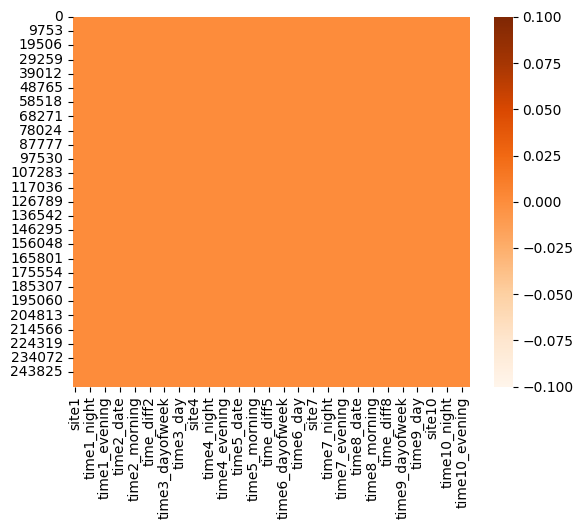

In [32]:
# визуализация пропусков
sns.heatmap(df4.isnull(), cmap = 'Oranges')

Пропуски все заполнились 

____________________________________________________________________________________________________________

### тест. датасет

In [33]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   site1             82797 non-null  int64         
 1   time1             82797 non-null  datetime64[ns]
 2   time1_date        82797 non-null  int32         
 3   time1_dayofweek   82797 non-null  int32         
 4   time1_night       82797 non-null  bool          
 5   time1_morning     82797 non-null  bool          
 6   time1_day         82797 non-null  bool          
 7   time1_evening     82797 non-null  bool          
 8   time_diff1        82797 non-null  float64       
 9   site2             82797 non-null  float64       
 10  time2             82797 non-null  object        
 11  time2_date        82797 non-null  float64       
 12  time2_dayofweek   82797 non-null  float64       
 13  time2_night       82797 non-null  bool          
 14  time2_morning     8279

In [34]:
print(df_test2.columns)

Index(['site1', 'time1', 'time1_date', 'time1_dayofweek', 'time1_night',
       'time1_morning', 'time1_day', 'time1_evening', 'time_diff1', 'site2',
       'time2', 'time2_date', 'time2_dayofweek', 'time2_night',
       'time2_morning', 'time2_day', 'time2_evening', 'time_diff2', 'site3',
       'time3', 'time3_date', 'time3_dayofweek', 'time3_night',
       'time3_morning', 'time3_day', 'time3_evening', 'time_diff3', 'site4',
       'time4', 'time4_date', 'time4_dayofweek', 'time4_night',
       'time4_morning', 'time4_day', 'time4_evening', 'time_diff4', 'site5',
       'time5', 'time5_date', 'time5_dayofweek', 'time5_night',
       'time5_morning', 'time5_day', 'time5_evening', 'time_diff5', 'site6',
       'time6', 'time6_date', 'time6_dayofweek', 'time6_night',
       'time6_morning', 'time6_day', 'time6_evening', 'time_diff6', 'site7',
       'time7', 'time7_date', 'time7_dayofweek', 'time7_night',
       'time7_morning', 'time7_day', 'time7_evening', 'time_diff7', 'site8',
    

In [35]:
df_test2 = df_test2.drop(columns = ['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10'])

In [36]:
# int32 на int64
df_test2['time1_date'] = df_test2['time1_date'].astype('int64')
df_test2['time1_dayofweek'] = df_test2['time1_dayofweek'].astype('int64')

In [37]:
# дни недели и дату на int
df_test2[int_col] = df_test2[int_col].astype('int64')

In [38]:
df_test2[col_site] = df_test2[col_site].astype('int64')

In [39]:
df_test2[bool_cols] = df_test2[bool_cols].astype('int64')

In [40]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   site1             82797 non-null  int64  
 1   time1_date        82797 non-null  int64  
 2   time1_dayofweek   82797 non-null  int64  
 3   time1_night       82797 non-null  int64  
 4   time1_morning     82797 non-null  int64  
 5   time1_day         82797 non-null  int64  
 6   time1_evening     82797 non-null  int64  
 7   time_diff1        82797 non-null  float64
 8   site2             82797 non-null  int64  
 9   time2_date        82797 non-null  int64  
 10  time2_dayofweek   82797 non-null  int64  
 11  time2_night       82797 non-null  int64  
 12  time2_morning     82797 non-null  int64  
 13  time2_day         82797 non-null  int64  
 14  time2_evening     82797 non-null  int64  
 15  time_diff2        82797 non-null  float64
 16  site3             82797 non-null  int64 

<Axes: >

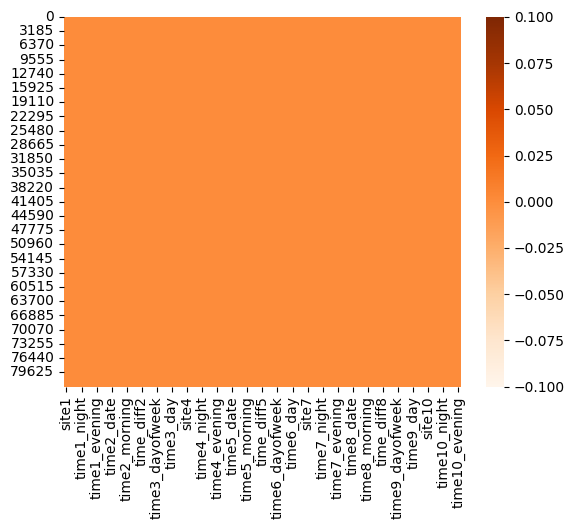

In [41]:
# визуализация пропусков
sns.heatmap(df_test2.isnull(), cmap = 'Oranges')

Пропусков нет

## 1.2 Работа с разреженным форматом данных

In [42]:
df_m = pd.read_csv('train_ses.csv', sep = ',')
df_m.columns

Index(['session_id', 'site1', 'time1', 'site2', 'time2', 'site3', 'time3',
       'site4', 'time4', 'site5', 'time5', 'site6', 'time6', 'site7', 'time7',
       'site8', 'time8', 'site9', 'time9', 'site10', 'time10', 'target'],
      dtype='object')

In [43]:
df_m = df_m.drop(columns = ['time1', 'time2', 'time3', 'time4', 'time5', 
                            'time6', 'time7', 'time8', 'time9', 'time10', 'target'])

In [44]:
df_m.head()

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
0,1,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0
2,3,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0
3,4,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0
4,5,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0


# Сессия 2


 ## 2.1 Визуальный анализ данных 

<Axes: >

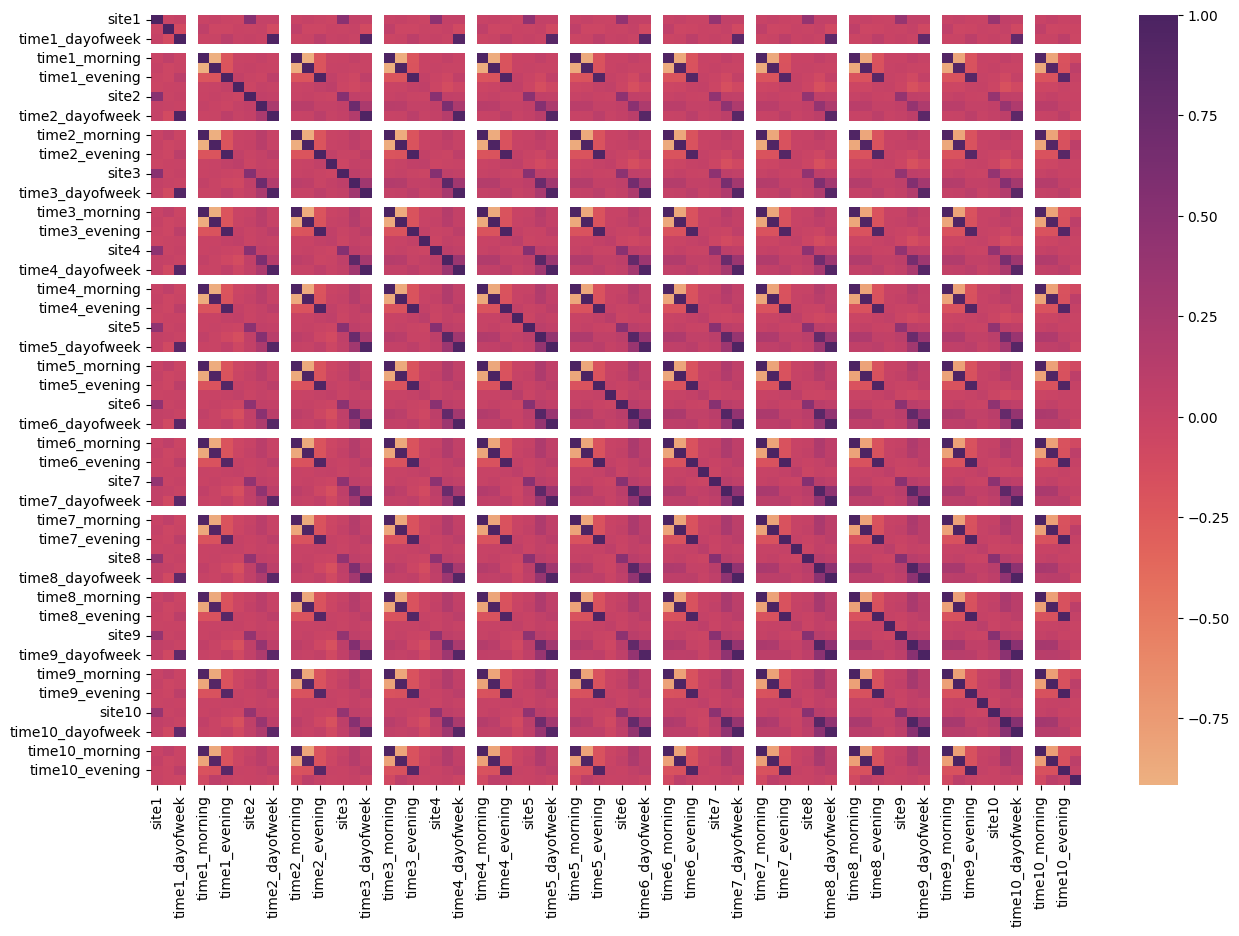

In [45]:
# матрица корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(df4.corr(), cmap='flare')

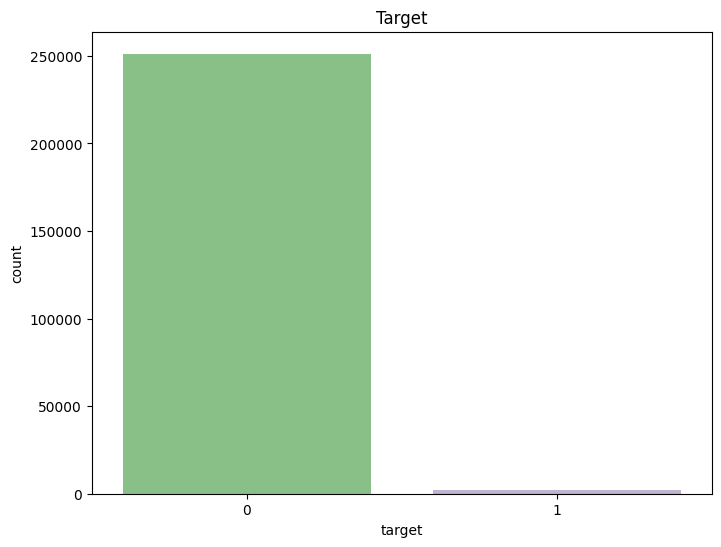

In [46]:
# распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.countplot(data = df4, x = 'target', palette = 'Accent')
plt.title('Target')
plt.show()

Сессий, принадлежавщих мошенников, очень-очень мало

___________________________________________________________________________________________

Активность по времени суток:

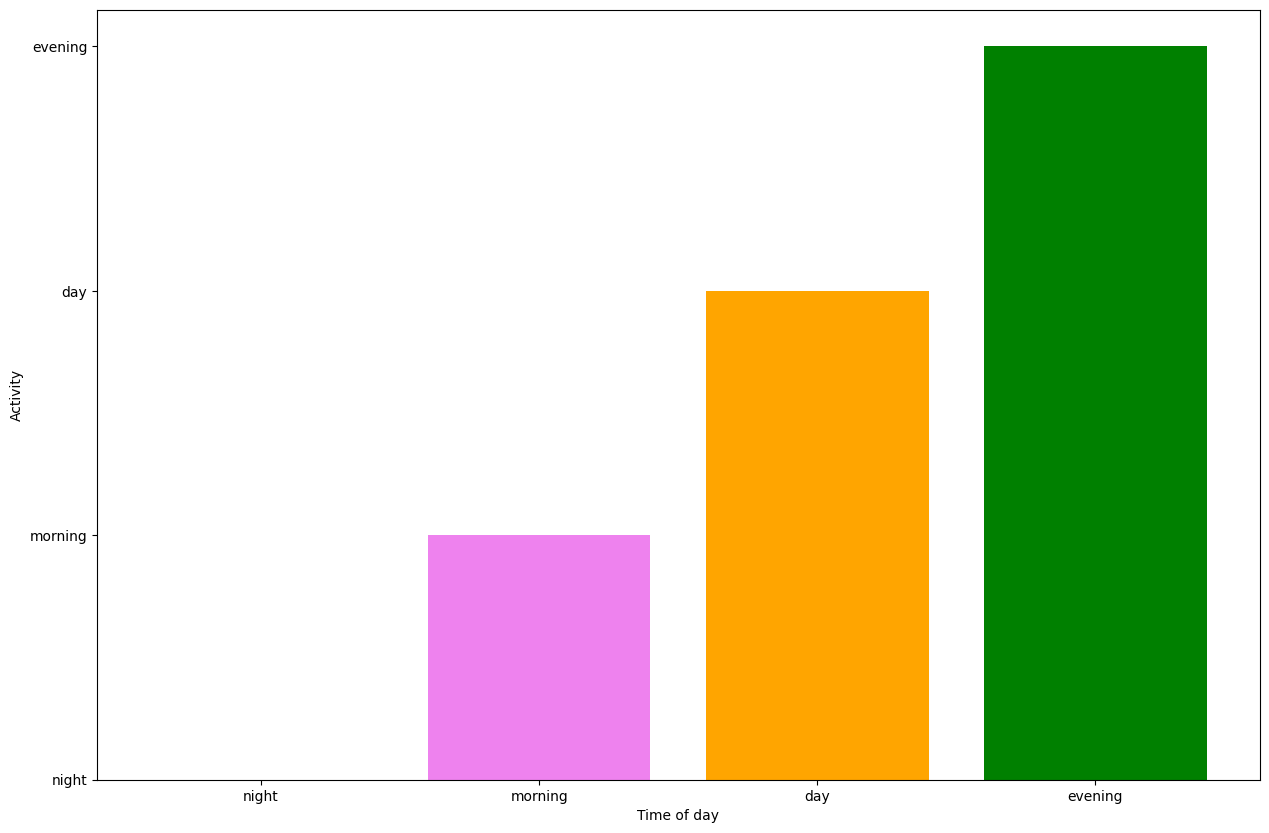

In [47]:
# словарь со временем суток
activity = {
    'night': 0,
    'morning': 0,
    'day': 0,
    'evening': 0
}

# с 1го сайта по 10ый
for i in range(1, 11):
    activity['night'] += df4[f'time{i}_night'].sum()
    activity['morning'] += df4[f'time{i}_morning'].sum()
    activity['day'] += df4[f'time{i}_day'].sum()
    activity['evening'] += df4[f'time{i}_evening'].sum()

activity_df = pd.DataFrame(list(activity.items()), columns = ['Time', 'Activity'])

# гистограмма
plt.figure(figsize = (15, 10))
plt.bar(activity_df['Time'], activity_df['Time'], color = ['blue', 'violet', 'orange', 'green'])
plt.xlabel('Time of day')
plt.ylabel('Activity')
plt.show()

Больше всего сайты посещают вечером, меньше всего (не посещают вообще) ночью.

Посмотрим, в какое время суток зафиксированно больше всего мошенников

Text(0, 0.5, 'The activity of scammers')

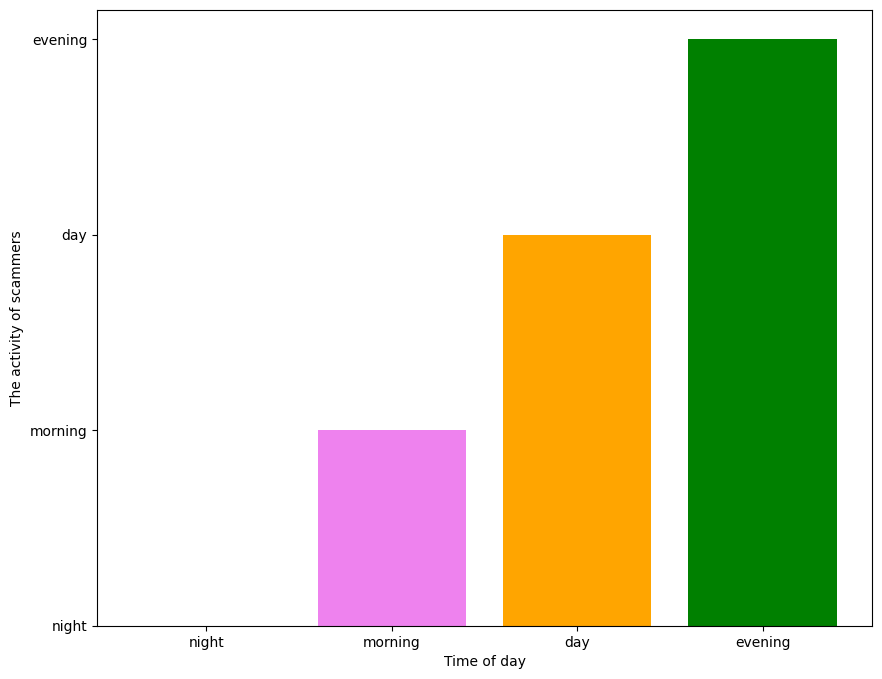

In [48]:
# словарь со временем суток
activity_scam = {
    'night': 0,
    'morning': 0,
    'day': 0,
    'evening': 0
}

# берём только те сеансы, которые принадлежат мошенникам
df_scam = df4[df4['target'] == 1]

# df_scam['target'].unique() : array([1])

# с 1го сайта по 10ый
for i in range(1, 11):
    activity_scam['night'] += df_scam[f'time{i}_night'].sum()
    activity_scam['morning'] += df_scam[f'time{i}_morning'].sum()
    activity_scam['day'] += df_scam[f'time{i}_day'].sum()
    activity_scam['evening'] += df_scam[f'time{i}_evening'].sum()

activity_scam_df = pd.DataFrame(list(activity_scam.items()), columns = ['Time', 'Activity'])





plt.figure(figsize=(10, 8))
plt.bar(activity_scam_df['Time'], activity_scam_df['Time'], color = ['blue', 'violet', 'orange', 'green'])
plt.xlabel('Time of day')
plt.ylabel('The activity of scammers')

In [49]:
#df_scam['target'].unique()

Мошенничества так же больше всего наблюдается вечером, а меньше всего - ночью (по данным не наблюдается вообще)

_______________________________________________________________________________________________

По данным видно, что какие-то сайты могли посещаться несколько раз за сессию. Визуализируем это

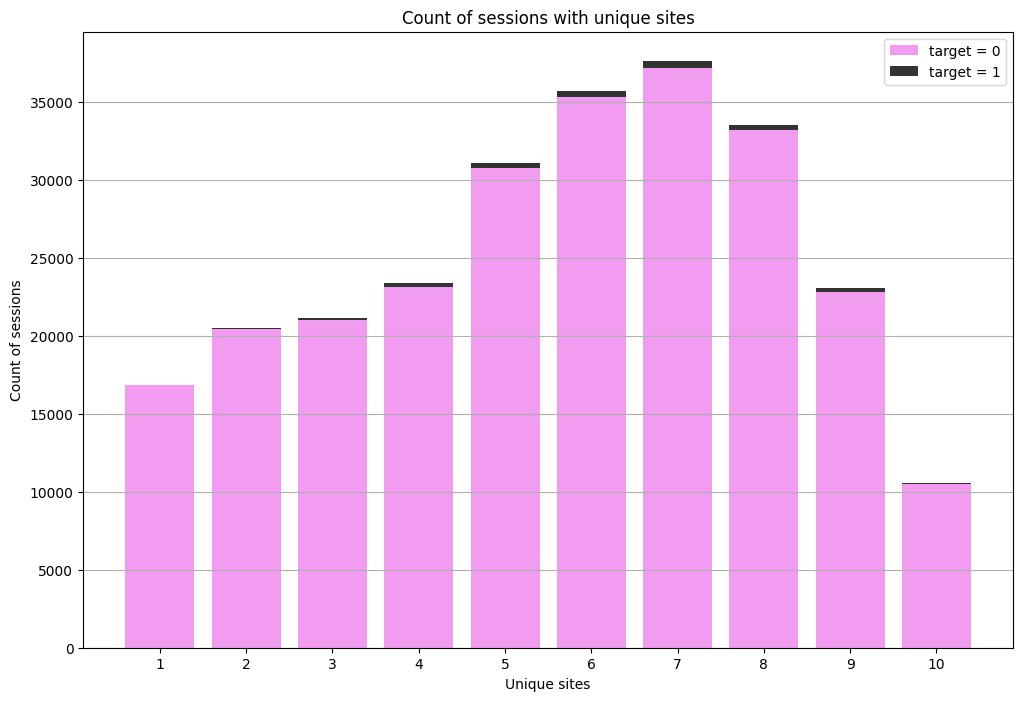

In [50]:
# подсчёт уникальных сайтов в сессии
def count_un_sites(row):
    sites = [row[f'site{i}'] for i in range(1, 11) if row[f'site{i}'] != 0] # не считаем нул. значения
    return len(set(sites))


df4['un_sites_count'] = df4.apply(count_un_sites, axis=1)

# группировка данных по количеству уникальных сайтов и значению target
grouped = df4.groupby(['un_sites_count', 'target']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))

# target = 0
plt.bar(grouped.index, grouped[0], label='target = 0', alpha=0.8, color = 'violet')

# target = 1
plt.bar(grouped.index, grouped[1], bottom=grouped[0], label='target = 1', alpha=0.8, color = 'black')

plt.xlabel('Unique sites')
plt.ylabel('Count of sessions')
plt.title('Count of sessions with unique sites')
plt.legend()
plt.xticks(grouped.index)
plt.grid(axis='y')
plt.show()

In [51]:
# кол-во 
print(grouped)

target              0    1
un_sites_count            
1               16830   33
2               20446   78
3               21004  141
4               23162  240
5               30763  368
6               35332  368
7               37185  467
8               33203  335
9               22855  206
10              10484   61


По обоим значениям target больше всего сессий с количеством уникальных сайтов равным 7

_______________________________________________________________________________________________________

Теперь посмотрим активность по дням недели

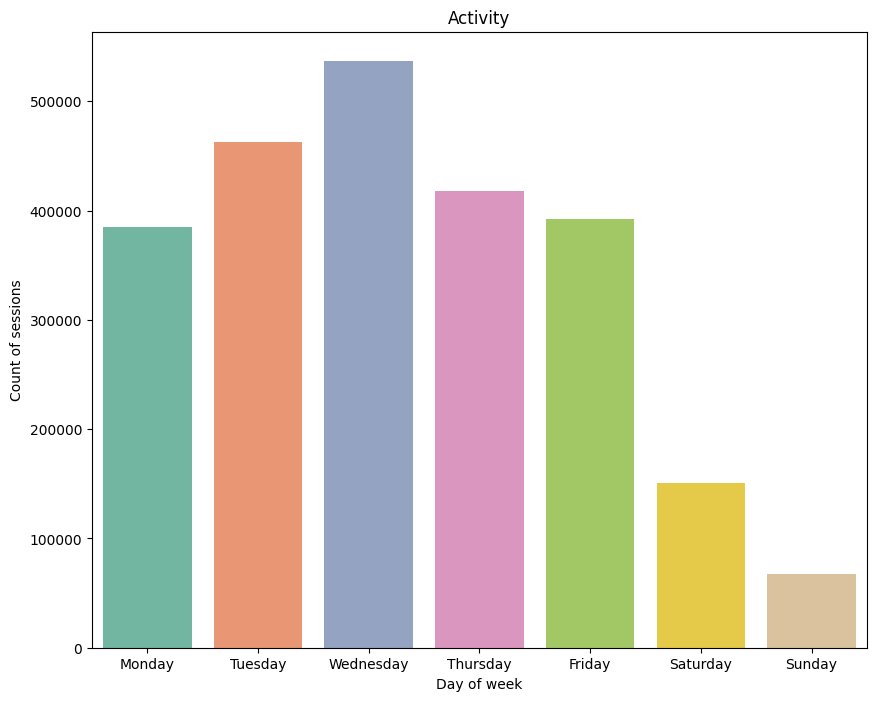

In [52]:
# список колонок, в которых указан день недели
time_cols = [col for col in df4.columns if 'time' in col and 'dayofweek' in col]

# df для данных по дням недели
day_of_week_count = pd.DataFrame(columns=['Day_of_week', 'Count'])

# кол-во сеансов для каждого дня недели
for col in time_cols:
    # считается кол-во вхождения каждого дня недели в колонке
    temp_df4 = df4[col].value_counts().reset_index() 
    temp_df4.columns = ['Day_of_week', 'Count']
    # добавление инфы по колонке в дф
    day_of_week_count = pd.concat([day_of_week_count, temp_df4], ignore_index=True)

# группировка данных по дням недели и суммирование количества сеансов
day_of_week_count = day_of_week_count.groupby('Day_of_week').sum().reset_index()

# меняем числовые значения на текст
day_of_week_word = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
day_of_week_count['Day_of_week'] = day_of_week_count['Day_of_week'].map(day_of_week_word)

# day_of_week_counts содержит кол-во каждого дня недели за все сессии

plt.figure(figsize=(10, 8))
sns.barplot(x='Day_of_week', y='Count', data=day_of_week_count, order=day_of_week_word.values(), palette = sns.color_palette('Set2', 7))
plt.title('Activity')
plt.xlabel('Day of week')
plt.ylabel('Count of sessions')
plt.show()

In [53]:
day_of_week_count

,Day_of_week,Count
0,NaN,122730
1,Monday,385394
2,Tuesday,463015
3,Wednesday,536769
4,Thursday,417544
5,Friday,391892
6,Saturday,150627
7,Sunday,67639


Самая высокая активность в среду, самая маленькая - воскресенье.

В целом активность высока со вторника по пятницу.

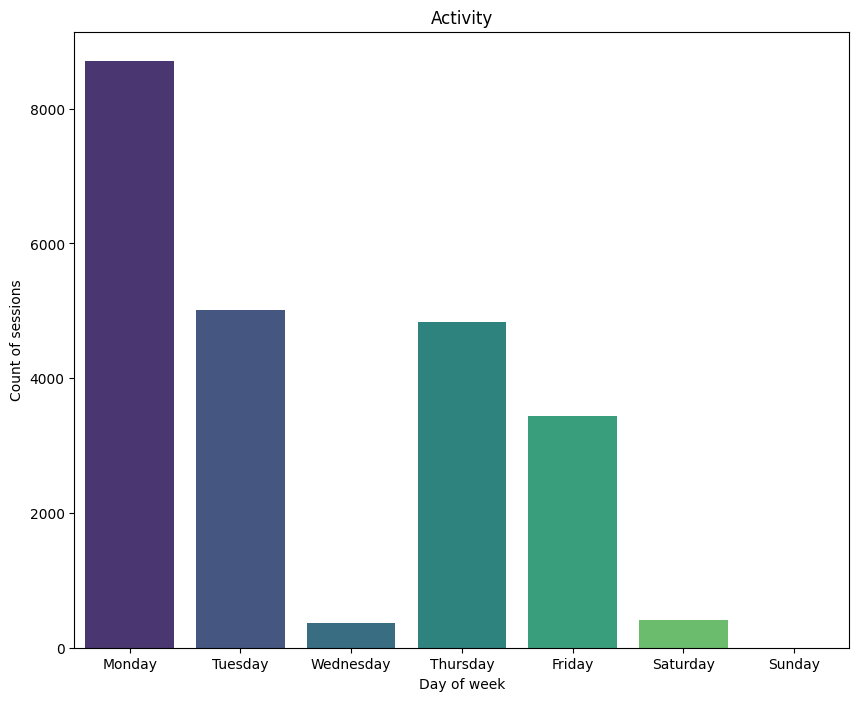

In [54]:
# df для данных по дням недели
day_of_week_sc = pd.DataFrame(columns=['Day_of_week', 'Count'])

# кол-во сеансов для каждого дня недели
for col in time_cols:
    # считается кол-во вхождения каждого дня недели в колонке
    temp_df4_sc = df_scam[col].value_counts().reset_index() 
    temp_df4_sc.columns = ['Day_of_week', 'Count']
    # добавление инфы по колонке в дф
    day_of_week_sc = pd.concat([day_of_week_sc, temp_df4_sc], ignore_index=True)

# группировка данных по дням недели и суммирование количества сеансов
day_of_week_sc = day_of_week_sc.groupby('Day_of_week').sum().reset_index()

day_of_week_sc['Day_of_week'] = day_of_week_sc['Day_of_week'].map(day_of_week_word)

# day_of_week_sc содержит кол-во каждого дня недели за все сессии

plt.figure(figsize=(10, 8))
sns.barplot(x='Day_of_week', y='Count', data=day_of_week_sc, order=day_of_week_word.values(), palette = sns.color_palette('viridis', 7))
plt.title('Activity')
plt.xlabel('Day of week')
plt.ylabel('Count of sessions')
plt.show()

In [55]:
day_of_week_sc

,Day_of_week,Count
0,NaN,201
1,Monday,8708
2,Tuesday,5015
3,Wednesday,370
4,Thursday,4829
5,Friday,3441
6,Saturday,405
7,Sunday,1


(??????????????????????????????????)

___________________________________________________________________________________________

In [56]:
# графики где показана активность по месяцам и годам  (должен был быть...)

# Сессия 3

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# делим дф на обучающую и отложенную выборки
X = df4.drop(columns = ['target', 'un_sites_count'], axis = 1)
y = df4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

# стандартизация данных

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

___________________________________________________________________________________________________
Модели:
* Логистическая регрессия
* Случайный лес
* CatBoost
* XGBoost
_____________________________________________________________________________________________

In [58]:
# метрики для оценки качества
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score

Логистическая регрессия:

In [59]:
from sklearn.linear_model import LogisticRegression

# создание обучение модельки
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

# предсказание на тесте
y_pred_lg = model_lg.predict(X_test)
y_pred_lg_proba = model_lg.predict_proba(X_test)[:, 1] # вероятность, что объекты из теста 
#                                                       принадлежат к классу 1 (для roc auc)

# метрики
f1 = f1_score(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg_proba)
accuracy = accuracy_score(y_test, y_pred_lg)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.9909
F1-Score: 0.0000
ROC-AUC: 0.8485


Результаты сомнительные, accuracy практиечски идеальный, а F-мера равна нулю, -> пробуем забалансить данные

### Баланс данных

Используем Downsampling и SMOTE.

Downsampling уменьшит размер данных, а SMOTE создаст синтетические данные с меньшим классом для баланса классов.

Соотношение количества выборок в классе меньшинства к количеству выборок в классе большинства берём 10 процентов

In [60]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(f'До: {Counter(y)}')

# уменьшаем больший класс
undersampler = RandomUnderSampler(random_state=42)
X_samp, y_samp = undersampler.fit_resample(X, y)
print(f'Баланс после Downsampling: {Counter(y_samp)}')


new_df = pd.concat([pd.DataFrame(X_samp, columns=X.columns), pd.Series(y_samp, name='target')], axis=1)
new_df

До: Counter({0: 251264, 1: 2297})
Баланс после Downsampling: Counter({0: 2297, 1: 2297})


,site1,time1_date,time1_dayofweek,time1_night,time1_morning,time1_day,time1_evening,time_diff1,site2,time2_date,...,time9_evening,time_diff9,site10,time10_date,time10_dayofweek,time10_night,time10_morning,time10_day,time10_evening,target
33509,229,201403,6,0,1,0,0,1.0,34733,201403,...,0,123.0,178,201403,6,0,1,0,0,0
135887,22,201401,6,0,0,1,0,4.0,22,201401,...,0,4.0,22,201401,6,0,0,1,0,0
100936,181,201311,5,0,0,1,0,0.0,1136,201311,...,0,0.0,182,201311,5,0,0,1,0,0
59602,273,201311,2,0,0,1,0,0.0,792,201311,...,0,1.0,792,201311,2,0,0,1,0,0
181646,49,201403,3,0,1,0,0,40.0,56,201403,...,0,0.0,32739,201403,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252789,80,201311,5,0,0,1,0,6.0,879,201311,...,0,8.0,80,201311,5,0,0,1,0,1
252849,2271,201311,5,0,0,1,0,28.0,37,201311,...,0,0.0,18876,201311,5,0,0,1,0,1
253139,4694,201403,1,0,0,1,0,2.0,27332,201403,...,0,2.0,2401,201403,1,0,0,1,0,1
253442,22,201404,1,0,0,1,0,0.0,617,201404,...,0,0.0,77,201404,1,0,0,1,0,1


In [62]:
new_df['target'].value_counts()

target
0    2297
1    2297
Name: count, dtype: int64

## 3.1 Сравнение нескольких алгоритмов на сессиях

Заново делим на выборки и стандартизируем данные

In [63]:
# делим дф на обучающую и отложенную выборки
X = new_df.drop(columns = ['target'], axis = 1)
y = new_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

# стандартизация данных

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

### Logistic regression:

Accuracy: 0.7999
F1-Score: 0.8215
ROC-AUC: 0.8600


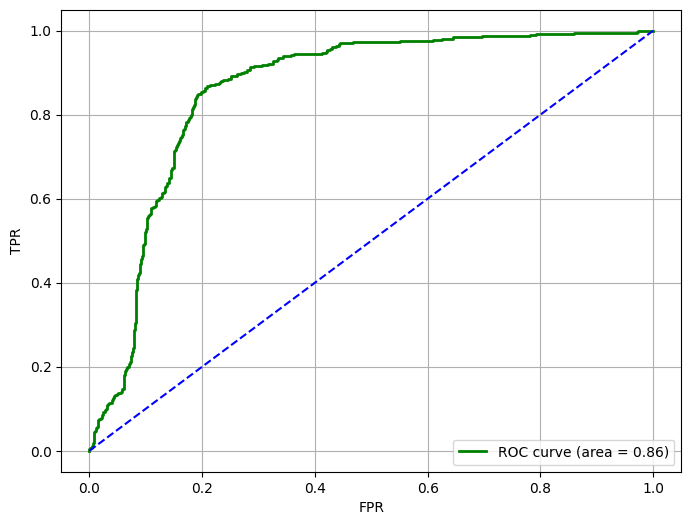

In [64]:
# создание обучение модельки
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

# предсказание на тесте
y_pred_lg = model_lg.predict(X_test)
y_pred_lg_proba = model_lg.predict_proba(X_test)[:, 1] # вероятность, что объекты из теста 
#                                                       принадлежат к классу 1 (для roc auc)

# метрики
f1 = f1_score(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg_proba)
accuracy = accuracy_score(y_test, y_pred_lg)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


# кривая ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Теперь значения Accuracy, F1-Score и ROC-AUC более приближены друг к другу. Модель на таких данных предсказывает лучше

### Random forest

Accuracy: 0.7230
F1-Score: 0.6822
ROC-AUC: 0.8501


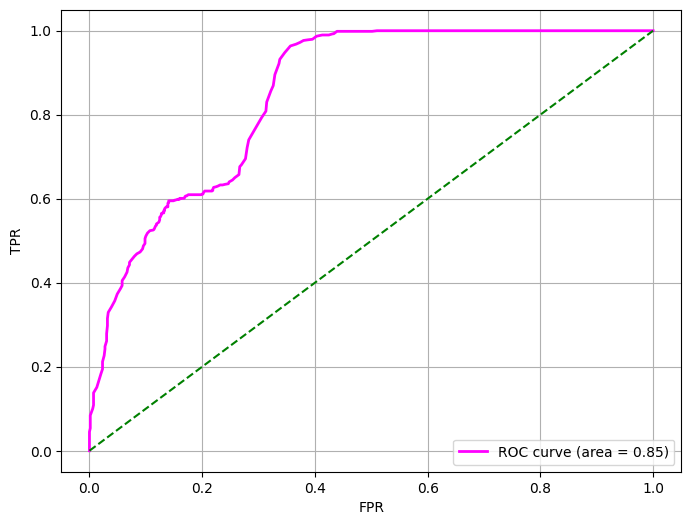

In [65]:
from sklearn.ensemble import RandomForestClassifier

# модель
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

# предсказание на тесте
y_pred_rf = model_rf.predict(X_test)
y_pred_rf_proba = model_rf.predict_proba(X_test)[:, 1]

# метрики
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'F1-Score: {f1_rf:.4f}')
print(f'ROC-AUC: {roc_auc_rf:.4f}')


# кривая ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='magenta', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Результат похуже, чем у логистической регрессии

### Catboost

Learning rate set to 0.016963
0:	learn: 0.6779721	total: 374ms	remaining: 6m 13s
1:	learn: 0.6626449	total: 392ms	remaining: 3m 15s
2:	learn: 0.6478911	total: 418ms	remaining: 2m 19s
3:	learn: 0.6327368	total: 432ms	remaining: 1m 47s
4:	learn: 0.6187804	total: 447ms	remaining: 1m 28s
5:	learn: 0.6057289	total: 598ms	remaining: 1m 38s
6:	learn: 0.5969551	total: 615ms	remaining: 1m 27s
7:	learn: 0.5858487	total: 628ms	remaining: 1m 17s
8:	learn: 0.5781844	total: 745ms	remaining: 1m 21s
9:	learn: 0.5680183	total: 758ms	remaining: 1m 15s
10:	learn: 0.5594404	total: 774ms	remaining: 1m 9s
11:	learn: 0.5496055	total: 857ms	remaining: 1m 10s
12:	learn: 0.5417612	total: 876ms	remaining: 1m 6s
13:	learn: 0.5335962	total: 900ms	remaining: 1m 3s
14:	learn: 0.5273625	total: 919ms	remaining: 1m
15:	learn: 0.5200126	total: 1.01s	remaining: 1m 2s
16:	learn: 0.5137283	total: 1.03s	remaining: 59.6s
17:	learn: 0.5082636	total: 1.05s	remaining: 57.1s
18:	learn: 0.5026020	total: 1.06s	remaining: 54.8s
19:

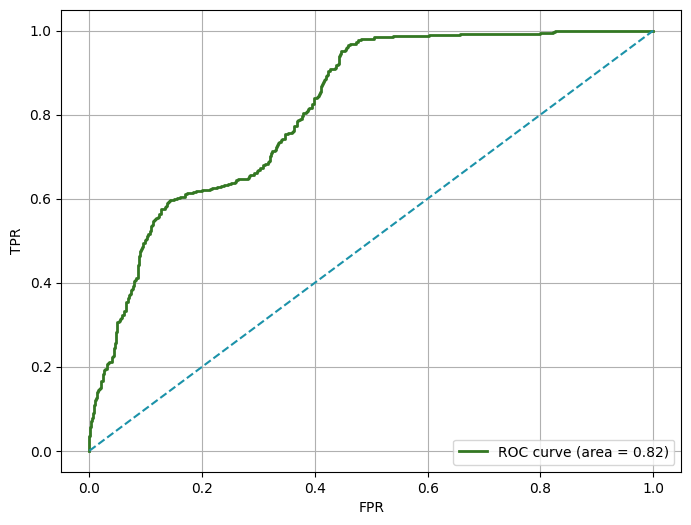

In [66]:
from catboost import CatBoostClassifier

# моделька
model_cb = CatBoostClassifier()
model_cb.fit(X_train, y_train)

# предсказание на тесте
y_pred_cb = model_cb.predict(X_test)
y_pred_cb_proba = model_cb.predict_proba(X_test)[:, 1]

# метрики
f1_cb = f1_score(y_test, y_pred_cb)
roc_auc_cb = roc_auc_score(y_test, y_pred_cb_proba)
accuracy_cb = accuracy_score(y_test, y_pred_cb)

print(f'Accuracy: {accuracy_cb:.4f}')
print(f'F1-Score: {f1_cb:.4f}')
print(f'ROC-AUC: {roc_auc_cb:.4f}')


# кривая ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#337722', lw=2, label=f'ROC curve (area = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], color='#1B92A9', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

F1-Score имеет самое низкое значение

### XGBoost

* пс: был выбор между XGBoost и LightGBM, но у XGBoost больше гиперпараметров и меньше возможность переобучения, поэтому выбор пал на него

Accuracy: 0.8158
F1-Score: 0.8090
ROC-AUC: 0.8851


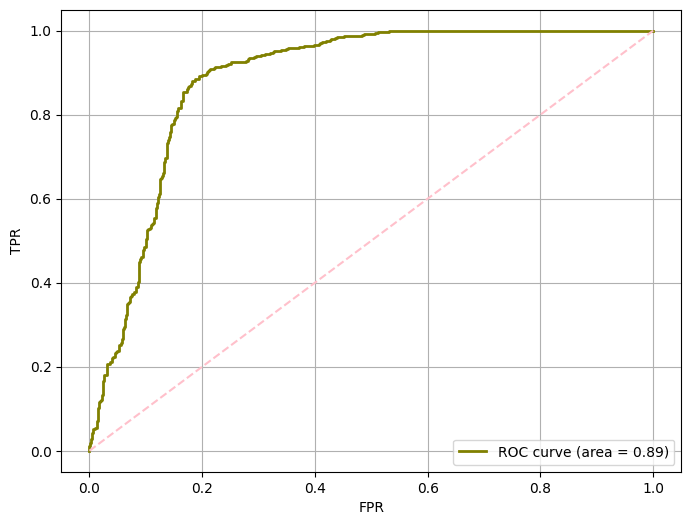

In [67]:
import xgboost as xgb

# моделька XGBoost
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# предсказание на тестовых данных
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_proba = model_xgb.predict_proba(X_test)[:, 1]

# метрики
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'F1-Score: {f1_xgb:.4f}')
print(f'ROC-AUC: {roc_auc_xgb:.4f}')


# кривая ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='olive', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Среди всех моделей лучшие показатели у XGBoost

## 3.2 Гиперпараметрическая оптимизация модели 

Для определения лучших гиперпараметров используем RandomizedSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

Лучшие гиперпараметры: {'n_estimators': 10, 'min_child_weight': 0.4, 'max_depth': 15, 'learning_rate': 0.5, 'gamma': 0}
Accuracy: 0.8361
F1-Score: 0.8333
ROC-AUC: 0.9198


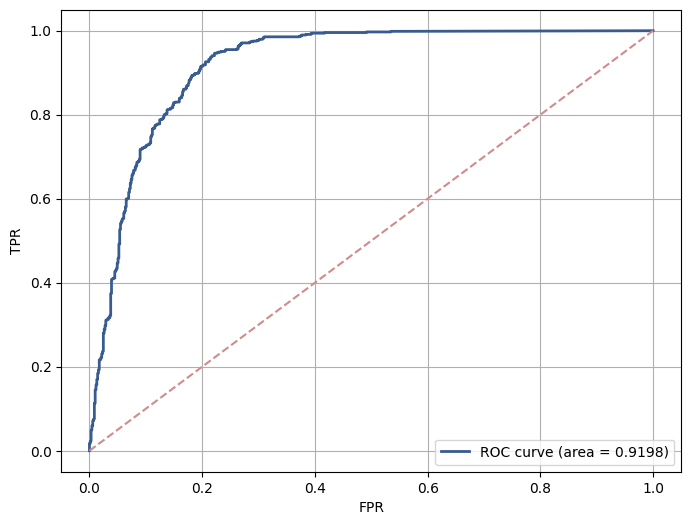

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SklearnXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = xgb.XGBClassifier(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self



# гиперпараметры
param_xgb = {
    'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_depth': [3, 5, 8, 10, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'gamma': [0, 0.5, 2, 5, 7, 10],
    'min_child_weight': [0.01, 0.2, 0.4, 0.5]
}


# модель
xgb_model = SklearnXGBClassifier(objective='binary:logistic')
model_xgb_rs = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions=param_xgb,
    cv = 3, # кросс валидация
    scoring = 'f1',
    random_state = 42,
    n_iter = 200
    )

model_xgb_rs.fit(X_train, y_train)
# лучшие гиперпараметры
print(f'Лучшие гиперпараметры: {model_xgb_rs.best_params_}')

# лучшая модель
best_model_xgb = model_xgb_rs.best_estimator_

# предсказание
y_pred_xgb2 = best_model_xgb.predict(X_test)
y_pred_probaxgb2 = best_model_xgb.predict_proba(X_test)[:, 1]


# метрики
f1_xgb2 = f1_score(y_test, y_pred_xgb2)
roc_auc_xgb2 = roc_auc_score(y_test, y_pred_probaxgb2)
accuracy_lr2 = accuracy_score(y_test, y_pred_xgb2)

print(f'Accuracy: {accuracy_lr2:.4f}')
print(f'F1-Score: {f1_xgb2:.4f}')
print(f'ROC-AUC: {roc_auc_xgb2:.4f}')


# кривая ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probaxgb2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#385B90', lw=2, label=f'ROC curve (area = {roc_auc_xgb2:.4f})')
plt.plot([0, 1], [0, 1], color='#D08C8C', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [70]:
# сохранение модели 
#import pickle
#with open('model_xgb.pkl', 'wb') as f:
#    pickle.dump(model_xgb, f)

_________________________________

## 3.3 Прогноз классификации для тестовой выборки 

In [81]:
# колонка с session_id
df_test_data = pd.read_csv('test_ses.csv', sep = ',')
df_ses = pd.DataFrame(df_test_data['session_id'])
df_ses

,session_id
0,1
1,2
2,3
3,4
4,5
...,...
82792,82793
82793,82794
82794,82795
82795,82796


In [82]:
X = df_test2
X = scale.fit_transform(X)
# предсказание вероятности
predict_proba_test = best_model_xgb.predict_proba(X)[:, 1]

# добавление предсказанных резов в df_ses

df_ses['target'] = predict_proba_test

In [83]:
df_ses

,session_id,target
0,1,0.025764
1,2,0.003710
2,3,0.011728
3,4,0.003710
4,5,0.003710
...,...,...
82792,82793,0.003710
82793,82794,0.003710
82794,82795,0.134221
82795,82796,0.003710


In [84]:
df_ses['target'].describe()

count    82797.000000
mean         0.177527
std          0.309114
min          0.003710
25%          0.003710
50%          0.009721
75%          0.137571
max          0.991625
Name: target, dtype: float64

In [85]:
# сохранение df_ses
#df_ses.to_csv('df_ses_ver3', index = False)